# First read in count daily data

All seasons are shifted to 2003-2004 because that year is a leap year (extra day).

For non-leap years, February 29th simply is always zero.

In [1]:
import pandas as pd

ctrl_counts = pd.read_csv("../table_data/combined_CTRL_daily_count.csv")
ctrl_counts['date'] = pd.to_datetime(ctrl_counts.date)
ctrl_counts = ctrl_counts.set_index('date')

pgw_counts = pd.read_csv("../table_data/combined_PGW_daily_count.csv")
pgw_counts['date'] = pd.to_datetime(pgw_counts.date)
pgw_counts = pgw_counts.set_index('date')

ctrl_counts.head(7)

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013
date,,,,,,,,,,,,
2003-10-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-02,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2003-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2003-10-07,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [2]:
pgw_counts.head(7)

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013
date,,,,,,,,,,,,
2003-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Resample the daily data to 7 day (1 week) periods

In [3]:
ctrl = ctrl_counts.resample('7D').sum()
pgw = pgw_counts.resample('7D').sum()

ctrl['period_mean'] = ctrl.mean(axis=1).values
pgw['period_mean'] = pgw.mean(axis=1).values

ctrl.head()

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013,period_mean
date,,,,,,,,,,,,,
2003-10-01,1.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.833333
2003-10-08,1.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,6.0,1.0,0.0,3.0,1.583333
2003-10-15,0.0,3.0,5.0,3.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.916667
2003-10-22,1.0,4.0,4.0,4.0,1.0,4.0,2.0,2.0,7.0,3.0,2.0,2.0,3.000000
2003-10-29,3.0,3.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,4.0,3.083333


In [4]:
pgw.head()

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013,period_mean
date,,,,,,,,,,,,,
2003-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2003-10-08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.250000
2003-10-15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
2003-10-22,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.416667
2003-10-29,0.0,0.0,1.0,5.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.166667


# Divide the PGW weekly mean by the CTRL weekly mean to get a mean percent change

In [5]:
a_perc = 100*(pgw.period_mean / ctrl.period_mean) - 100

a_perc

date
2003-10-01   -100.000000
2003-10-08    -84.210526
2003-10-15    -95.652174
2003-10-22    -86.111111
2003-10-29    -62.162162
2003-11-05    -56.818182
2003-11-12    -43.181818
2003-11-19    -32.558140
2003-11-26    -30.909091
2003-12-03      2.127660
2003-12-10    -17.021277
2003-12-17    -23.214286
2003-12-24     -8.163265
2003-12-31    -23.076923
2004-01-07    -10.000000
2004-01-14    -11.538462
2004-01-21    -10.714286
2004-01-28    -11.111111
2004-02-04      4.444444
2004-02-11      6.250000
2004-02-18    -10.000000
2004-02-25    -17.073171
2004-03-03     -8.695652
2004-03-10    -10.000000
2004-03-17    -12.820513
2004-03-24    -33.333333
2004-03-31    -38.461538
2004-04-07    -62.857143
2004-04-14    -44.444444
2004-04-21    -81.250000
2004-04-28    -85.714286
Freq: 7D, Name: period_mean, dtype: float64

# Do the same for the other data

Read in the files

In [6]:
var_files = ["combined_{}_daily_count.csv",
             "combined_{}_daily_swe.csv",
             "combined_{}_daily_area.csv",
             "combined_{}_daily_area_50p.csv",
             "combined_{}_daily_area_90p.csv"]

data_folder = "../table_data/"

results = {'count':None, 'swe':None, 'area':None, 'area_50p':None, 'area_90p':None}

for var in var_files:

    var_name = var.split("_")[-1][:-4]
    
    pgw = pd.read_csv(data_folder + var.format('PGW'))

    ctrl = pd.read_csv(data_folder + var.format('CTRL'))

    ctrl['date'] = pd.to_datetime(ctrl.date)
    pgw['date'] = pd.to_datetime(pgw.date)

    ctrl = ctrl.set_index('date')
    pgw = pgw.set_index('date')

    ctrl = ctrl.resample('7D').sum()
    pgw = pgw.resample('7D').sum()

    ctrl['period_mean'] = ctrl.mean(axis=1).values
    pgw['period_mean'] = pgw.mean(axis=1).values

    ctrl_cumsum = ctrl.cumsum()
    pgw_cumsum = pgw.cumsum()

    results[var_name] = 100*(pgw.period_mean / ctrl.period_mean) - 100
    
    print(var_name)

count
swe
area
50p
90p


# Plot the data

Text(0, 0.5, 'Percent Difference')

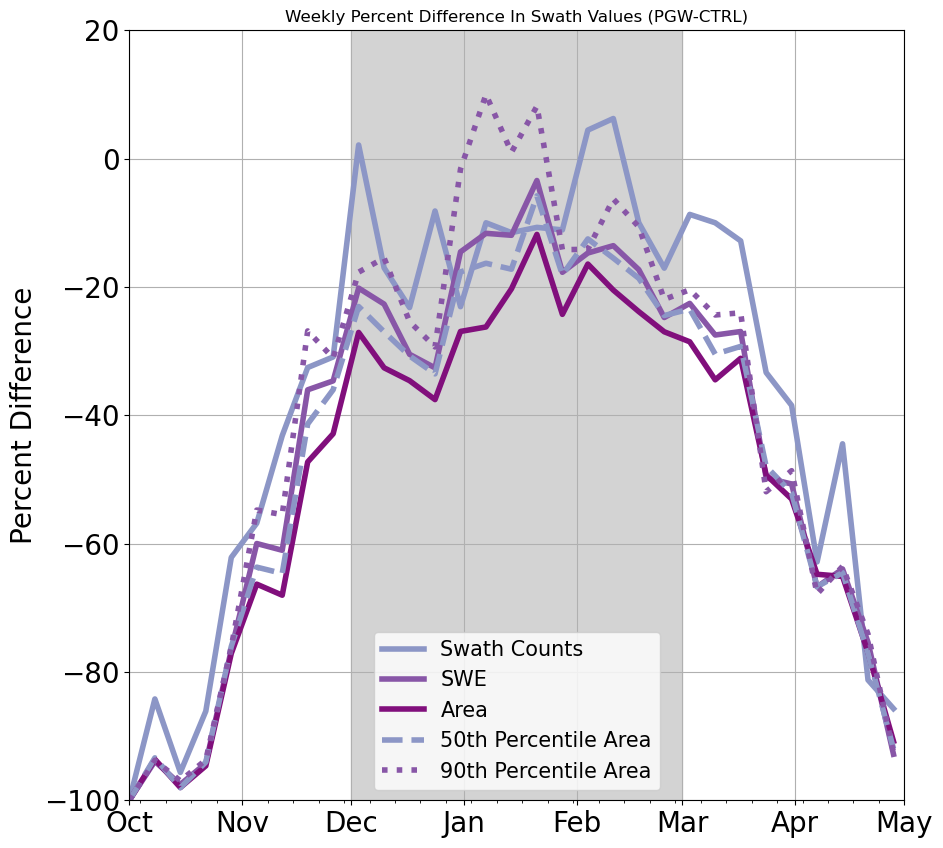

In [7]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()

ax = plt.subplot(1,1,1)

colors = {'count':'#8c96c6', 
          'swe':'#8856a7', 
          'area':'#810f7c', 
          '50p':'#8c96c6', 
          '90p':'#8856a7'}

labels = {'count':'Swath Counts', 
          'swe':'SWE', 
          'area':'Area', 
          '50p':'50th Percentile Area', 
          '90p':'90th Percentile Area'}

ls = {'count':'-', 
      'swe':'-', 
      'area':'-', 
      '50p':'--', 
      '90p':':'}


for key in ['count', 'swe', 'area', '50p', '90p']:

    ax.plot(ctrl.index, results[key], label=labels[key], 
            lw=4, ls=ls[key], color=colors[key])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.set_xlim([datetime.date(2003, 10, 1), datetime.date(2004, 5, 1)])

plt.legend(prop={'size':15})

ax.set_title("Weekly Percent Difference In Swath Values (PGW-CTRL)")

plt.axvspan(datetime.date(2003, 12, 1), datetime.date(2004, 3, 1), color='lightgrey')
plt.grid()

plt.ylim(-100, 20)

ax.set_ylabel("Percent Difference")